In [2]:
# genetic_disease_model.py (converted from .ipynb)

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

# Load dataset
df = pd.read_csv("/home/sanglap/Documents/Project/my_project/archive/train_genetic_disorders.csv")

# Drop rows with missing values in important columns
df = df.dropna(subset=["Genetic Disorder"])

# Create a risk level target based on disorder type
risk_mapping = {
    'Mitochondrial genetic inheritance disorders': 'High',
    'Single-gene inheritance disorders': 'Moderate',
    'Multifactorial genetic inheritance disorders': 'Low'
}

# Map the disorder to risk level
df['Risk Level'] = df['Genetic Disorder'].map(risk_mapping)

# Drop rows with unmapped risk
df = df.dropna(subset=['Risk Level'])

# Define features
features = [
    "Mother's age", "Father's age", 'Blood test result', 'Birth defects', 'Gender',
    "Genes in mother's side", 'Inherited from father', 'Maternal gene', 'Paternal gene',
    'White Blood cell count (thousand per microliter)', 'Blood cell count (mcL)',
    'Folic acid details (peri-conceptional)', 'H/O serious maternal illness',
    'H/O radiation exposure (x-ray)', 'H/O substance abuse',
    'Assisted conception IVF/ART', 'History of anomalies in previous pregnancies',
    'No. of previous abortion'
]

# Filter valid rows
df = df.dropna(subset=features)

# One-hot encode and prepare data
X = pd.get_dummies(df[features])
y = df['Risk Level']

# Save model features
joblib.dump(X.columns, "model_features.pkl")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
preds = model.predict(X_test)
preds_proba = model.predict_proba(X_test)
pred_confidence = [max(prob) for prob in preds_proba]
acc = accuracy_score(y_test, preds)
print(f"Validation Accuracy: {acc*100:.2f}%")

# Save model
joblib.dump(model, "genetic_risk_model.pkl")


Validation Accuracy: 83.31%


['genetic_risk_model.pkl']

In [3]:
df.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass,Risk Level
8,PID0x8ce3,11.0,No,No,Yes,No,5.209058,Willie,Camacho,Tr,...,6.669552,slightly abnormal,1.0,1.0,1.0,0.0,1.0,Mitochondrial genetic inheritance disorders,Leigh syndrome,High
9,PID0x8660,4.0,No,Yes,Yes,Yes,4.752272,John,Sandoval,Gregori,...,6.397702,abnormal,0.0,0.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes,Low
12,PID0x74ab,1.0,Yes,Yes,No,No,4.612265,Eric,Harness,Mano,...,7.995115,slightly abnormal,1.0,1.0,0.0,1.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome,High
14,PID0x7678,6.0,Yes,No,Yes,No,4.620420,Ruth,Homza,Cesareo,...,3.000000,slightly abnormal,1.0,0.0,1.0,0.0,1.0,Mitochondrial genetic inheritance disorders,Leigh syndrome,High
18,PID0x952d,10.0,Yes,Yes,Yes,No,4.751452,James,Whipple,Dvon,...,9.382407,abnormal,1.0,1.0,0.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy,High


In [4]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Sample true and predicted values
y_true = [3, -0.5, 2, 7]       # actual values
y_pred = [2.5, 0.0, 2, 8]      # predicted values

# Calculate MAE
mae = mean_absolute_error(y_true, y_pred)

# Calculate MSE
mse = mean_squared_error(y_true, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate R² Score
r2 = r2_score(y_true, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.2f}")



Mean Absolute Error (MAE): 0.5000
Mean Squared Error (MSE): 0.3750
Root Mean Squared Error (RMSE): 0.6124
R² Score: 0.95


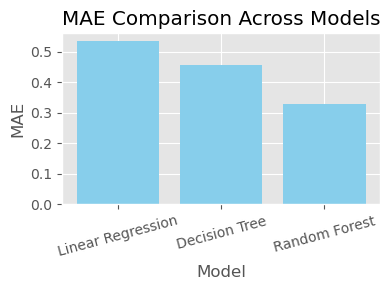

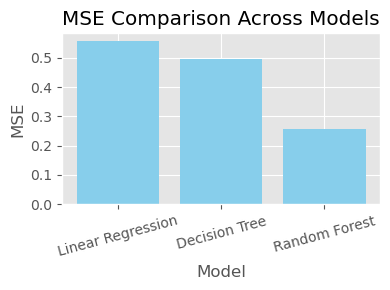

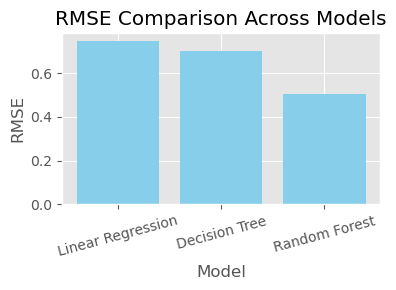

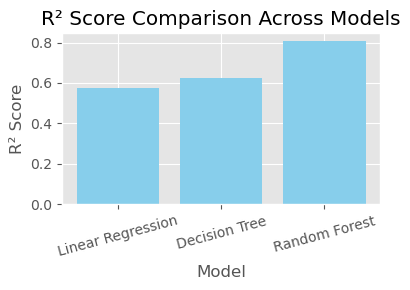

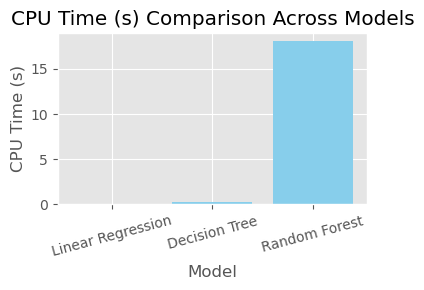

In [14]:
import matplotlib.pyplot as plt

# Set plot style
plt.style.use('ggplot')

# Plot each metric
metrics = ['MAE', 'MSE', 'RMSE', 'R² Score', 'CPU Time (s)']

for metric in metrics:
    plt.figure(figsize=(4, 3))
    plt.bar(results_df['Model'], results_df[metric], color='skyblue')
    plt.title(f'{metric} Comparison Across Models')
    plt.ylabel(metric)
    plt.xlabel('Model')
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show()
